# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [3]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Leo,"Title: Leo\nRelease Date: November 21, 2023\nG...",Leo
Silent Night,Silent Night (2023) Director: John Woo\nWriter...,The silent Night
The Color Purple,Director: Blitz Bazawule\nWriters: Marcus Gard...,The color Purple
The Family Man,Title: The Family Plan\nRelease Date: December...,The family Man- Part1
The Shepherd,The Shepherd is a 2023 British drama short fil...,The Shepherd


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Leo,"Title: Leo\nRelease Date: November 21, 2023\nG...",Leo,0.176483,0.549723
Silent Night,Silent Night (2023) Director: John Woo\nWriter...,The silent Night,-0.073273,0.592316
The Color Purple,Director: Blitz Bazawule\nWriters: Marcus Gard...,The color Purple,0.154657,0.514224
The Family Man,Title: The Family Plan\nRelease Date: December...,The family Man- Part1,0.119579,0.518556
The Shepherd,The Shepherd is a 2023 British drama short fil...,The Shepherd,0.050939,0.519295


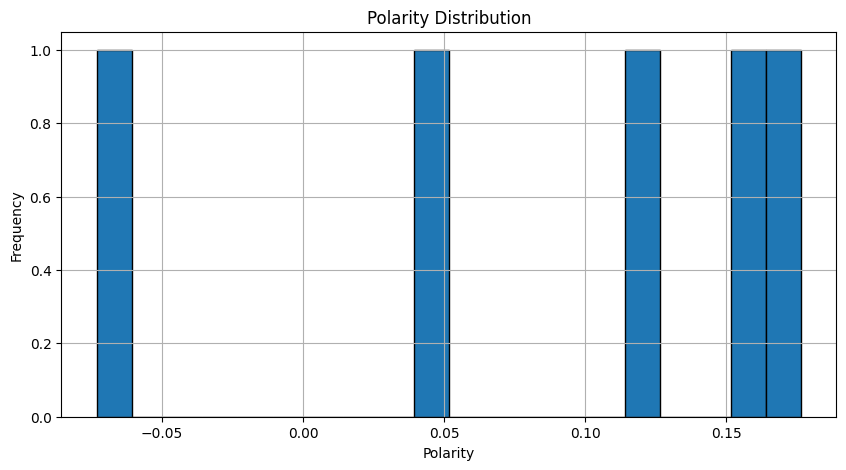

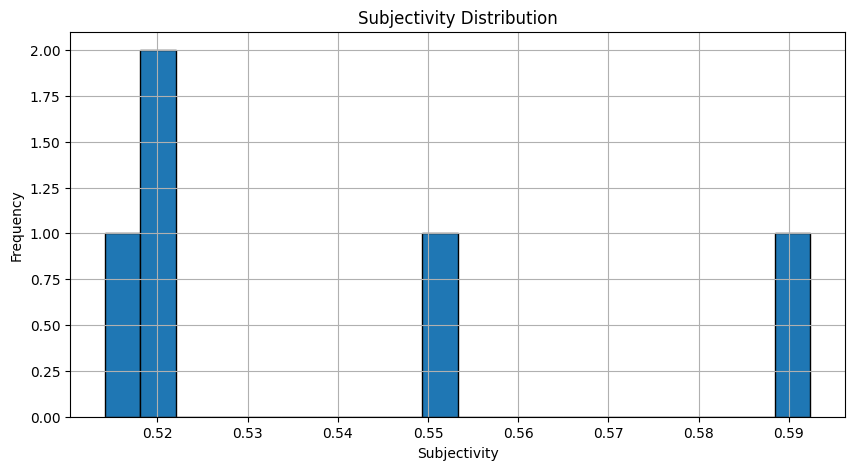

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Access polarity and subjectivity data
polarity = data['polarity']
subjectivity = data['subjectivity']

# Create histogram for polarity
plt.figure(figsize=(10, 5))  # Set figure size
plt.hist(polarity, bins=20, edgecolor='black')  # Create histogram with 20 bins and black edges
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity Distribution')
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

# Create histogram for subjectivity
plt.figure(figsize=(10, 5))
plt.hist(subjectivity, bins=20, edgecolor='black')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Subjectivity Distribution')
plt.grid(True)
plt.show()

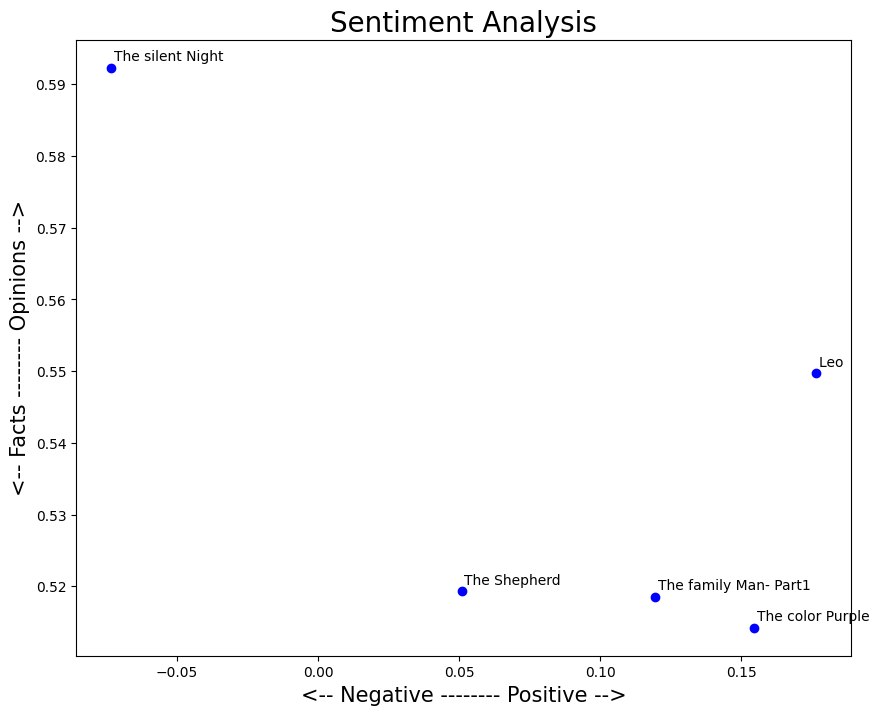

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
   # plt.xlim(-.01, .12)
#x is assigned polarity value for movies
#y is assigned subjectivity value for movies
#plt.text adds text label to each data points and +0.001 ensures that text does not overlap with dot
#plt.xlim sets x axis limit to specific range

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list
text= "Hey there  I think your shirt’s on backwards. Come on! Look at this. Bunch of motormouths"
chunks=split_text(text)
print(chunks)

['Hey ther', 'e  I thi', 'nk your ', 'shirt’s ', 'on backw', 'ards. Co', 'me on! L', 'ook at t', 'his. Bun', 'ch of mo']


In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
Leo,"Title: Leo\nRelease Date: November 21, 2023\nG...",Leo,0.176483,0.549723
Silent Night,Silent Night (2023) Director: John Woo\nWriter...,The silent Night,-0.073273,0.592316
The Color Purple,Director: Blitz Bazawule\nWriters: Marcus Gard...,The color Purple,0.154657,0.514224
The Family Man,Title: The Family Plan\nRelease Date: December...,The family Man- Part1,0.119579,0.518556
The Shepherd,The Shepherd is a 2023 British drama short fil...,The Shepherd,0.050939,0.519295


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces
#nested list
#list_pieces store split text for each movie
#means 10 parts for each movie

[['Title: Leo\nRelease Date: November 21, 2023\nGenre: Animated Comedy\nDirectors: Robert Marianetti, Robert Smigel, David Wachtenheim\nWriters: Robert Smigel, Adam Sandler, Paul Sado\nProducers: Adam Sandler, Allen Covert, Barry Josephson, Erin Westerman\nStudio: Happy Madison Productions\nCast: Adam Sandler, Bill Burr, Cecily Strong\nRunning Time: 1 hour 42 minutes\nLanguage: English Leo, a 74-year-old lizard who has lived in the same Florida school classroom for decades, is ready for a change. When he learns that he only has one year left to live, he decides to escape and experience life on the outside. However, his plans go awry when he gets caught up in the problems of his anxious students and an impossibly mean substitute teacher. The film was animated by Animal Logic, the same studio that produced Happy Madison’s previous animated films, Hotel Transylvania and Hotel Transylvania 2.\nThe film’s score was composed by Mark Mothersbaugh, who has also scored several other Happy Madis

In [ ]:
len(list_pieces)

5

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript
#polarity transcript is nested list with lists of movies inside it
#every movie has 10 parts and polarity of 10 parts is in polarity_piece and polarity_piece list is stored in polarity_transcript

[[0.14817994505494506,
  0.13736934072871573,
  0.1368822098838965,
  0.15818715428090432,
  0.25453441848068387,
  0.10301371287762418,
  0.24460658990372114,
  0.25232079315886136,
  0.08640931304727463,
  0.21083211257988047],
 [-0.098666371942234,
  0.03125000000000001,
  0.05425824175824175,
  0.07396694214876033,
  -0.14264069264069265,
  -0.17526041666666667,
  -0.4105263157894737,
  -0.1754724984217172,
  -0.187603305785124,
  0.1296236559139785],
 [0.17898041194916198,
  0.0747429769304769,
  0.10761171138365057,
  0.14806416095478597,
  0.26828727424918813,
  0.14594175845435925,
  0.09822089633938591,
  0.1371017520013055,
  0.19026478647014375,
  0.1985400268922996],
 [0.1774850722521713,
  0.06413384178714365,
  0.08537600172644819,
  0.21029244053437599,
  0.07391266561721103,
  0.186451504844362,
  0.1391568158953723,
  0.07134720794792736,
  0.08502815570672713,
  0.1067934869260204],
 [-0.02971230158730158,
  0.3276190476190476,
  0.04893162393162395,
  0.0877192982456

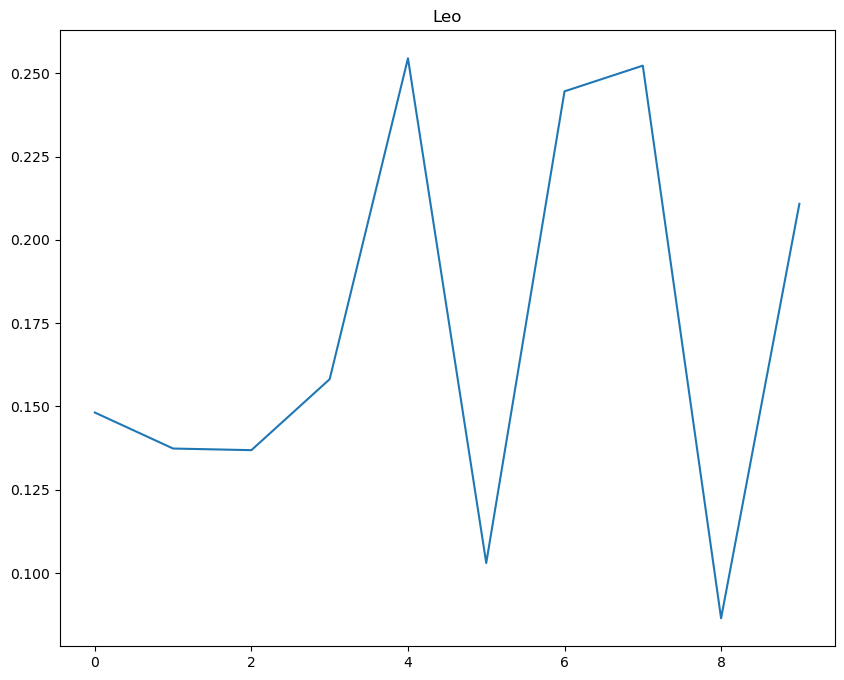

In [ ]:
# Show the plot for 1st movie
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

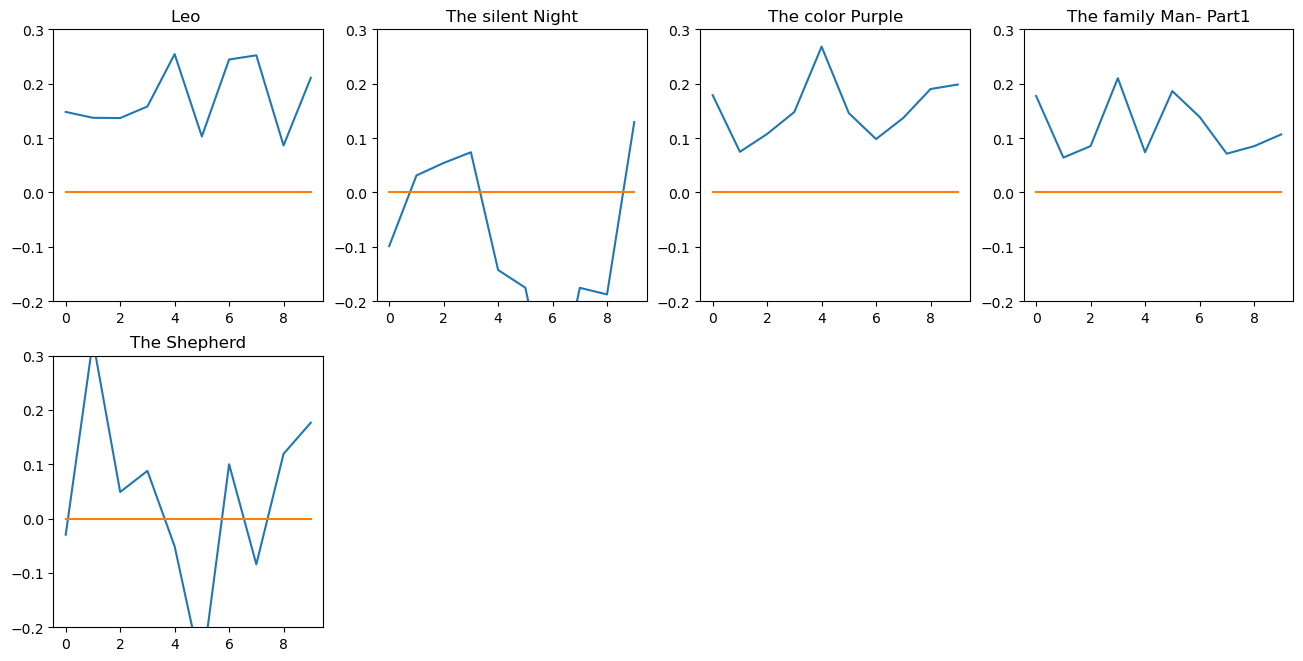

In [ ]:
# Show the plot for all
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

### Assignments:
1. Classify all movies accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
#1

import pandas as pd

# Assuming 'data' is your DataFrame containing sentiment analysis results
# Creates a copy of the DataFrame data, presumably containing sentiment analysis results.
classification_data = data.copy()

# Classify based on Polarity
classification_data['polarity_class'] = classification_data['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Classify based on Subjectivity
classification_data['subjectivity_class'] = classification_data['subjectivity'].apply(lambda x: 'Subjective or opinion' if x > 0.5 else 'Objective or fact')

# Display the classification
print(classification_data[['full_name', 'polarity_class', 'subjectivity_class']])


                              full_name polarity_class     subjectivity_class
Leo                                Leo        Positive  Subjective or opinion
Silent Night           The silent Night       Negative  Subjective or opinion
The Color Purple       The color Purple       Positive  Subjective or opinion
The Family Man    The family Man- Part1       Positive  Subjective or opinion
The Shepherd               The Shepherd       Positive  Subjective or opinion


In [ ]:
#2
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    # Calculate length of text
    length = len(text)

    # If the length of text is less than n, return the entire text as a single chunk
    if length <= n:
        return [text]

    # Calculate the size of each chunk of text and the starting points of each chunk of text
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


In [ ]:
import matplotlib.pyplot as plt

# Modify the number of sections
n_values = [5, 10, 15, 20, 25]  # You can add more values as needed


for n in n_values:
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n=n)
        list_pieces.append(split)

    # Sentiment analysis for each section
    polarity_transcript = []
    subjectivity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        subjectivity_piece = []
        for p in lp:
            analysis = TextBlob(p).sentiment
            polarity_piece.append(analysis.polarity)
            subjectivity_piece.append(analysis.subjectivity)
        polarity_transcript.append(polarity_piece)
        subjectivity_transcript.append(subjectivity_piece)


# Classification based on average sentiment scores over sections
classification_data = data.copy()

for n in n_values:
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n=n)
        list_pieces.append(split)

    polarity_transcript = []
    subjectivity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        subjectivity_piece = []
        for p in lp:
            analysis = TextBlob(p).sentiment
            polarity_piece.append(analysis.polarity)
            subjectivity_piece.append(analysis.subjectivity)
        polarity_transcript.append(polarity_piece)
        subjectivity_transcript.append(subjectivity_piece)

    average_polarity = np.mean(polarity_transcript, axis=1)
    average_subjectivity = np.mean(subjectivity_transcript, axis=1)

    classification_data[f'polarity_class_sections_{n}'] = ['Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral') for x in average_polarity]
    classification_data[f'subjectivity_class_sections_{n}'] = ['Subjective' if x > 0.5 else 'Objective' for x in average_subjectivity]

# Display the classification
print(classification_data.filter(like='polarity_class_sections'))
print(classification_data.filter(like='subjectivity_class_sections'))
#here we have calculated polarity and subjevtivity mean for each movie on that basis define +ve or -ve
# for diff values of n we have calc and filled nested list of polarity and subjectivity


                 polarity_class_sections_5 polarity_class_sections_10  \
Leo                               Positive                   Positive   
Silent Night                      Negative                   Negative   
The Color Purple                  Positive                   Positive   
The Family Man                    Positive                   Positive   
The Shepherd                      Positive                   Positive   

                 polarity_class_sections_15 polarity_class_sections_20  \
Leo                                Positive                   Positive   
Silent Night                       Negative                   Negative   
The Color Purple                   Positive                   Positive   
The Family Man                     Positive                   Positive   
The Shepherd                       Positive                   Positive   

                 polarity_class_sections_25  
Leo                                Positive  
Silent Night            

In [ ]:
#so only The Shepherd is objective that too when n=25  and THE Silent Night is the most negative